<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sistemas-Inteligentes" data-toc-modified-id="Sistemas-Inteligentes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sistemas Inteligentes</a></span><ul class="toc-item"><li><span><a href="#Laboratório-4---Clusterização" data-toc-modified-id="Laboratório-4---Clusterização-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Laboratório 4 - Clusterização</a></span><ul class="toc-item"><li><span><a href="#Identificação-do-Aluno" data-toc-modified-id="Identificação-do-Aluno-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Identificação do Aluno</a></span><ul class="toc-item"><li><span><a href="#Nome-Completo" data-toc-modified-id="Nome-Completo-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Nome Completo</a></span></li><li><span><a href="#RA" data-toc-modified-id="RA-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>RA</a></span></li></ul></li></ul></li><li><span><a href="#Importação-e-preparação-dos-dados" data-toc-modified-id="Importação-e-preparação-dos-dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importação e preparação dos dados</a></span></li><li><span><a href="#Clusterização" data-toc-modified-id="Clusterização-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clusterização</a></span></li><li><span><a href="#Algoritmo-K-MEANS" data-toc-modified-id="Algoritmo-K-MEANS-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Algoritmo K-MEANS</a></span></li><li><span><a href="#Algoritmo-de-Propagação-de-Afinidade" data-toc-modified-id="Algoritmo-de-Propagação-de-Afinidade-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Algoritmo de Propagação de Afinidade</a></span></li><li><span><a href="#Aplicação---Compressão-de-Imagem" data-toc-modified-id="Aplicação---Compressão-de-Imagem-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Aplicação - Compressão de Imagem</a></span></li></ul></li></ul></div>

# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização 
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo

ESCREVA AQUI A SUA RESPOSTA

#### RA

ESCREVA AQUI A SUA RESPOSTA

## Importação e preparação dos dados

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [3]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [26]:
### Escreva seu código aqui ###
iris = load_iris()
iris_data = iris.data
target = iris.target

# Aplicando PCA
iris_data_pca = PCA(n_components=2).fit_transform(iris_data)

In [30]:
# Splitando dados
X_train, X_test, y_train, y_test = tts(iris_data_pca, target)

## Clusterização 

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [31]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

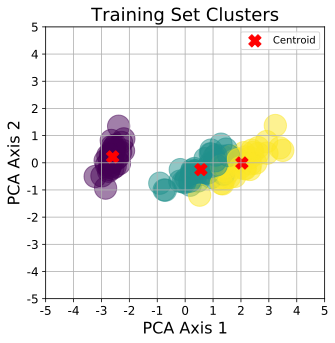

In [32]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [57]:
### Escreva seu código aqui ###
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
y_pred = kmeans.predict(X_test)

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [59]:
kmeans.cluster_centers_

array([[ 0.67408204, -0.3514329 ],
       [-2.59852396,  0.21485709],
       [ 2.26996472,  0.2468695 ]])

In [60]:
### Escreva seu código aqui ###

Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [61]:
### Escreva seu código aqui ###
kmeans.inertia_

45.98784566778501

Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

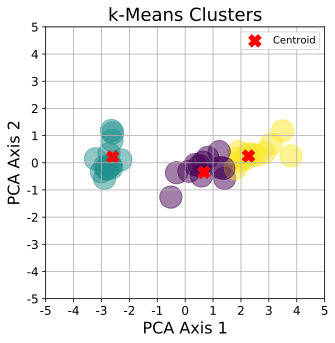

In [62]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [69]:
### Escreva seu código aqui ###
afp = AffinityPropagation()
afp.fit(X_train)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

Mostre os centróides dos grupos.

In [70]:
afp.cluster_centers_

array([[-2.53757337,  0.51036755],
       [-2.71539062, -0.16955685],
       [ 2.91813423,  0.78038063],
       [ 2.16537886,  0.21528028],
       [ 0.0432464 , -0.58148945],
       [ 1.29066965, -0.11642525]])

In [20]:
### Escreva seu código aqui ###

array([[ 1.11624072, -0.08421401],
       [-2.78743398, -0.22774019],
       [ 0.0432464 , -0.58148945],
       [-2.53757337,  0.51036755],
       [ 3.07652162,  0.68576444],
       [ 2.16537886,  0.21528028]])

Mostre os índices dos grupos.

In [73]:
### Escreva seu código aqui ###
afp.cluster_centers_indices_

array([16, 27, 44, 69, 83, 85], dtype=int64)

Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [22]:
### Escreva seu código aqui ###

array([0, 2, 0, 5, 0, 5, 2, 0, 0, 2, 5, 0, 5, 2, 5, 1, 0, 2, 5, 3, 5, 2,
       5, 2, 3, 1, 2, 5, 0, 3])

In [77]:
y_pred_ap = afp.predict(X_test)
y_pred_ap

array([2, 2, 0, 1, 5, 5, 3, 3, 1, 3, 5, 4, 1, 0, 2, 4, 4, 3, 4, 1, 5, 0,
       3, 3, 1, 1, 1, 0, 5, 5, 1, 1, 2, 0, 3, 5, 4, 4], dtype=int64)

Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

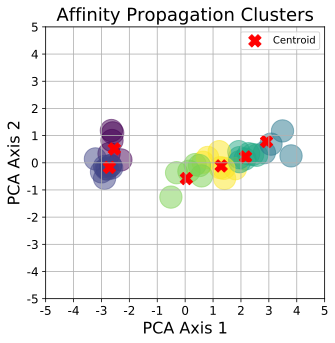

In [78]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=afp.cluster_centers_[:,0], y=afp.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [24]:
### Escreva seu código aqui ###

(600, 800, 3)

Exiba a imagem

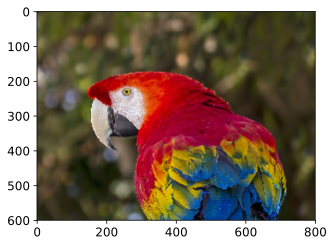

In [25]:
### Escreva seu código aqui ###

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [26]:
### Escreva seu código aqui ###

(480000, 3)

Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [29]:
### Escreva seu código aqui ###

CPU times: user 116 ms, sys: 15.4 ms, total: 131 ms
Wall time: 213 ms


Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [30]:
### Escreva seu código aqui ###

CPU times: user 74.8 ms, sys: 36.1 ms, total: 111 ms
Wall time: 206 ms


Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [31]:
### Escreva seu código aqui ###

CPU times: user 43.4 ms, sys: 80.5 ms, total: 124 ms
Wall time: 216 ms


In [32]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((w, h, d))
    grupo_idx = 0
    for i in range(w):
        for j in range(h):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

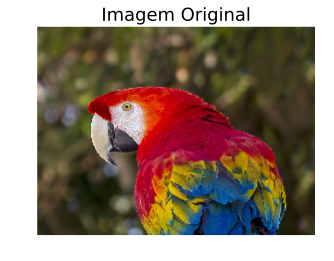

In [33]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

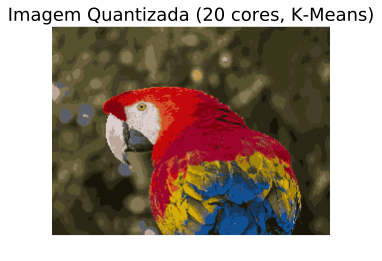

In [34]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

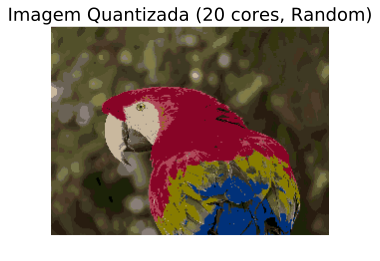

In [35]:
### Escreva seu código aqui ###